In [1]:
import scipy.constants
from scipy.constants import physical_constants
import qutip as qtp
import numpy as np
from numpy import exp, sqrt, sin
from math import factorial
import itertools
from operator import mul, add
import matplotlib.pyplot as plt
import ast

In [2]:
import importlib
import sys, os
from pathlib import Path
sys.path.append('../tools/')
import IonChainTools as ict
import MSFidelityEstimation as msfe
importlib.reload(msfe)
from MSFidelityEstimation import *

# QSCOUT Params

In [3]:
# Ytterbium171
M=171*physical_constants['atomic mass constant'][0]

# Laser wavelength
# carrier_wavelen = # 355*1e-9 # 355nm, from "frequency robust ..." paper
# carrier_wavenum = 2*π/carrier_wavelen # Laser wavenumber (k)
# carrier_freq = scipy.constants.c*carrier_wavenum
qbit_splitting = 2*π*12.643*1e6 # qubit splitting, from "Engineering The ..." paper
raman_wavelen = 355*1e-9 # 355nm, from "frequency robust ..." paper
raman_freq = 2*π*scipy.constants.c/raman_wavelen
kvec = qbit_splitting/scipy.constants.c*np.sqrt(2)

# Rabi rate
Ωpeak = 2*π*190*1e3 # 190MHz, quoted in "Frequency-robust MS ..." paper

In [4]:
# Trap specifications
# Axial COM of 0.52MHz and highest radial mode of 2.296MHz are quoted in 
# "Frequency-robust Mølmer-Sørensen gates via balanced contributions of multiple motional modes"
νz = 2*π*0.52*1e6 # 0.52MHz
νr = 2*π*2.296*1e6 # 2.296MHz

In [5]:
# Optical Crosstalk, from "ENGINEERING THE QUANTUM SCIENTIFIC COMPUTING OPEN USER TESTBED"
# These values are scaled such that Ω=1 for the target ion
neighΩ = 0.0236 # Rabi frequency on neighbor of target ion
nneighΩ = 0.006 # Rabi frequency on next neighbor of target ion

In [6]:
# Blue and Red beam phases
# Below should implement X gate
ϕB = π/2
ϕR = π/2

In [7]:
N = 5
modetype="radial"
K = 1
τ = 200e-6 # 200μs

# Rabi Crosstalk Measurement

In [9]:
def rabi(Ω,t):
    return np.sin(Ω*t/2)**2

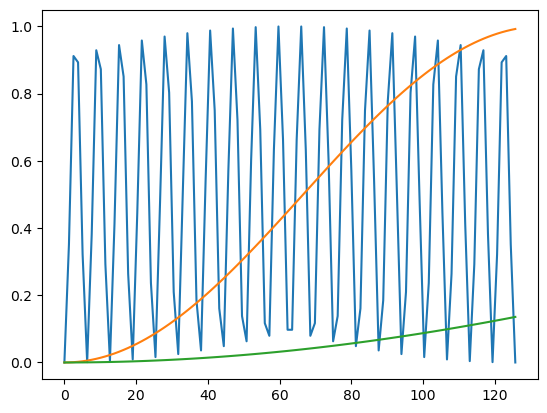

In [22]:
fig,ax = plt.subplots(1,1)

ts = np.linspace(0,20*2*pi,100)

ax.plot(ts,rabi(1,ts))
ax.plot(ts,rabi(neighΩ,ts))
ax.plot(ts,rabi(nneighΩ,ts))

plt.show()

# MS Optical Crosstalk